<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Challenge1_Regression_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# Your code here :

df2018 = pd.merge(df_main, 
         df_opinion, 
         how="left", 
         left_on='DATE',
         right_on='date')

In [ ]:
# contôle du merge : : Il doit y avoir 35 lignes et 20 colonnes

df2018.shape

(365, 21)

In [ ]:
# drop colonne date en doublon

df2018.drop(columns=['date'], inplace=True)

In [ ]:
# contôle du drop : Il doit y avoir 365 lignes et 20 colonnes

df2018.shape 

(365, 20)

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
#crer une colonne pour le scatterplot en bas

df2018['flag'] = df2018['SUNHOUR'].isna()
#si il y a une valeur il me retourne True sinon False

In [ ]:
# Your code here : df_clean". This DF should have 341 rows and 20 columns.

df_clean = df2018.dropna() # pour effacer les lignes avec NaN

In [ ]:
df_clean.shape

(341, 21)

In [ ]:
#reset index df_clean
df_clean.reset_index(inplace=True)

# drop column index because a new has created
df_clean.drop('index', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check reset index df_clean
df_clean.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,False
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,False
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,False
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,False
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,False


In [ ]:
df_nan = df2018[df2018['SUNHOUR'].isna()]

In [ ]:
# This DF should have 24 rows and 20 columns.
df_nan.shape

(24, 21)

In [ ]:
#reset index df_nan
df_nan.reset_index(inplace=True)

# drop column index because a new has created
df_nan.drop('index', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check reset index df nan
df_nan.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,NaN,True
1,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,NaN,True
2,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,NaN,True
3,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,NaN,NaN,True
4,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,NaN,NaN,True


## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
# Your code here :

# 1- Etude de corrélation

df_corr = df_clean.corr()
df_corr


# 2 - Determiner les variables les plus corrélées avec la variable cible: la colonne 'SUNHOUR'

corr_SUNHOUR = df_corr[['SUNHOUR']].sort_values(by='SUNHOUR', ascending = False)
corr_SUNHOUR

,SUNHOUR
SUNHOUR,1.000000
HEATINDEX_MAX_C,0.662918
TEMPERATURE_NOON_C,0.656062
MAX_TEMPERATURE_C,0.648781
TEMPERATURE_EVENING_C,0.628938
WINDTEMP_MAX_C,0.616540
DEWPOINT_MAX_C,0.518595
MIN_TEMPERATURE_C,0.466166
TEMPERATURE_MORNING_C,0.452963
VISIBILITY_AVG_KM,0.149634


In [ ]:
# find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).
# You are trying to predict SUNHOUR, so what's your target y ? SUNHOUR

from sklearn.model_selection import train_test_split

cols = ['HEATINDEX_MAX_C', 'TEMPERATURE_NOON_C', 'MAX_TEMPERATURE_C', 'TEMPERATURE_EVENING_C', 'WINDTEMP_MAX_C', 'CLOUDCOVER_AVG_PERCENT','HUMIDITY_MAX_PERCENT']

# variables les corrélées (cf corr_SUNHOUR ci-dessus)
X = df_clean[cols]
# cible
y = df_clean['SUNHOUR']

# train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Regression linéaire avec le train dataset
model_regress = LinearRegression().fit(X_train,y_train)

# Comparaison entre les R2 scores avec .score (methode sklearn) :
print(f"Score for the Train dataset : {round(model_regress.score(X_train, y_train),2)}")
print(f"Score for the Test dataset : {round(model_regress.score(X_test, y_test),2)}")




'''Avons nous un underfitting ou overfitting ? Non le score est correct'''



Score for the Train dataset : 0.68
Score for the Test dataset : 0.63


'Avons nous un underfitting ou overfitting ? Non le score est correct'

## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:
'''Be carreful when you use data for predict sunhour with min and max temp. It's only ok if data come country concerned.
This database for exemple, isn't the same for data in Laponie, the predict won't be good if you take this database who has created with French data
Of course, I think this database is french, but I don't know'''

# dans la colonne SUNHOUR de df_nan, je vais mettre à la place les valeurs de cols
df_nan['SUNHOUR'] = model_regress.predict(df_nan[cols])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# chek column SUNHOUR before add data

df_nan.SUNHOUR

0      8.442553
1      7.803856
2      7.285228
3      8.012206
4      5.959895
5     12.914348
6     13.442511
7     12.343696
8      9.701251
9     14.968436
10    11.251492
11    14.816051
12    14.054337
13    12.372252
14    13.847844
15    12.120440
16    12.563506
17    12.298996
18    11.965946
19    10.827700
20    11.047714
21     7.070769
22     4.470654
23     8.129687
Name: SUNHOUR, dtype: float64

## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

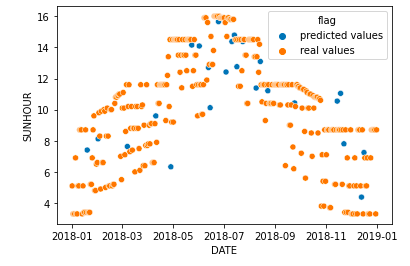

In [ ]:
# Your code here :

#concatenate 2 df : df_clean & df_nan
df2018complete = pd.concat([df_clean,df_nan])

#reset index
df2018complete.reset_index(inplace=True)

#drop column index in double in df
df2018complete.drop('index', axis = 1, inplace = True)

In [ ]:
# contrôle
df2018complete.tail(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
363,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,NaN,NaN,NaN,4.470654,NaN,True
364,2018-12-16,12,7,23,7,12,9,1.6,91,10.000,1015,48.375,12,7,6,NaN,NaN,NaN,8.129687,NaN,True


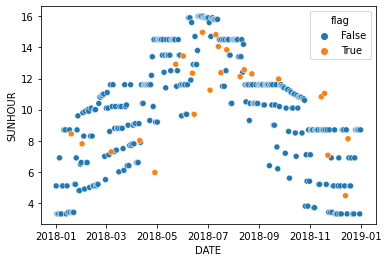

In [ ]:
# Draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
#Try to add a flag to identify real values and predicted values. => Je bloque ici

df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'])

sns.scatterplot(data = df2018complete, x ='DATE', y ='SUNHOUR', hue ='flag')

plt.show()